### **프로젝트 주제: Wine Quality Prediction**
참고 소스 url
<br>데이터 : https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 <br>
분석코드 : https://www.kaggle.com/midouazerty/redwine-data-for-beginners/notebook


### **프로젝트 기간**
#### 22/03/07 - 03/08

### **3조 프로젝트 구성원**
- 김미나
- 김진아
- 추성원
- 정재은

### **목차**


1.   프로젝트 목적
2.   데이터 설명
3.   데이터 분석 과정
4.   시각화
5.   결론



---------------------------------------------------

### **1. 프로젝트 목적** 
    1) 본 프로젝트의 목적
        - 와인의 화학적 성분을 통해 와인의 품질을 예측할 수 있을지 알아보기 위함.
        수치만으로 와인 품질 분류의 자동화가 가능하다면 인력 절감이 가능할 것으로 보인다. 
        (테스트 셋의 quality 예측 / 임의의 물리화학적 지수가 주어진 가상의 와인 quality를 예측)

    2) 미니 프로젝트 목적
        - 분류 모델링의 다양한 기법을 탐구하여 머신러닝활용 능력 함양 




In [1]:
# 필요한 라이브러리 가져오기
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

### **2. 데이터 설명**

이 데이터 셋은 포르투갈 와인인 비노베르데 중 레드와인들을 다룬 데이터 셋입니다. <br>
(for more : https://archive.ics.uci.edu/ml/datasets/wine+quality). 

입력변수 Input variables (물리화학적 데이터):

1. 고정 산도 (결합산)
2. 휘발성 산도
3. 구연산
4. 잔류 설탕 (잔당)
5. 염화물
6. 유리 이산화황
7. 총 이산화황
8. 밀도
9. pH
10. 황산염
11. 알코올

출력변수 Output variable (감각기반):

12. 품질 (0에서 10)




### **3. 데이터 분석 과정**

In [2]:
"""
# 오픈드라이버용
from google.colab import drive
import os, shutil

drive.mount('/content/drive/')
os.chdir('drive/My Drive/open_directory')
!pwd

wine = pd.read_csv('winequality-red.csv')
wine
"""

"\n# 오픈드라이버용\nfrom google.colab import drive\nimport os, shutil\n\ndrive.mount('/content/drive/')\nos.chdir('drive/My Drive/open_directory')\n!pwd\n\nwine = pd.read_csv('winequality-red.csv')\nwine\n"

In [3]:
# 각자 드라이브에 wine quality-red.csv를 바로가기로 추가한다.
from google.colab import drive
drive.mount('/content/drive')
wine = pd.read_csv('/content/drive/My Drive/winequality-red.csv')
wine

Mounted at /content/drive


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1592,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1593,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1594,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
# 상위 5개 행을 출력
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# wine df의 정보를 출력
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [6]:
#요약 통게량을 출력
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000,1596.000000
mean,8.314160,0.527954,0.270276,2.535558,0.087120,15.858396,46.382206,0.996744,3.311917,0.656385,10.421147,5.637218
std,1.732203,0.179176,0.193894,1.405515,0.045251,10.460554,32.839138,0.001888,0.153346,0.163057,1.060371,0.807080
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996745,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997833,3.400000,0.730000,11.100000,6.000000
max,15.600000,1.580000,0.790000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,1.980000,14.000000,8.000000


In [7]:
# df 행,열의 크기를 출력
wine.shape

(1596, 12)

In [8]:
# wine df 컬럼명 출력
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [9]:
# quality 컬럼 값안에 종류별로 몇 개의 데이터가 있는지 확인
wine.quality.value_counts()

5    680
6    637
7    199
4     52
8     18
3     10
Name: quality, dtype: int64

#### missing value

In [10]:
# wine df 컬럼별 결측값 개수 구하기
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### **4. 시각화 visualization**

#### 각 컬럼별 구간분포 히스토그램

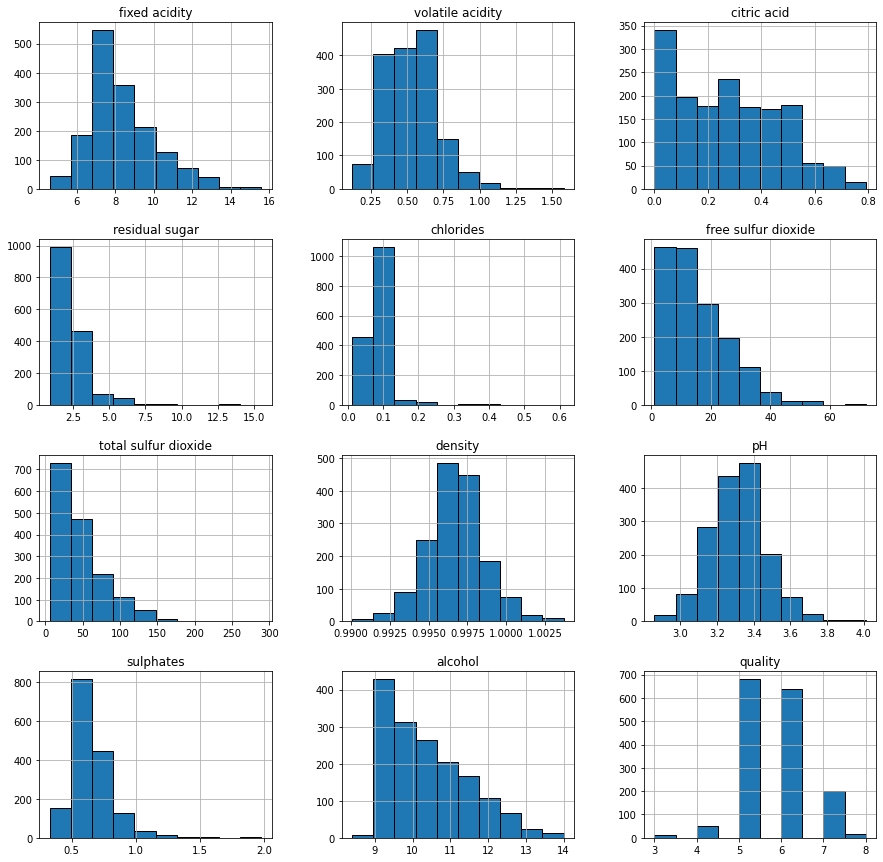

In [11]:
# 컬러, 크기 설정 후 나타낸 구간분포 히스토그램
wine.hist(edgecolor='black',figsize=(15,15))
plt.show()

#### 산점도 관계분포도 

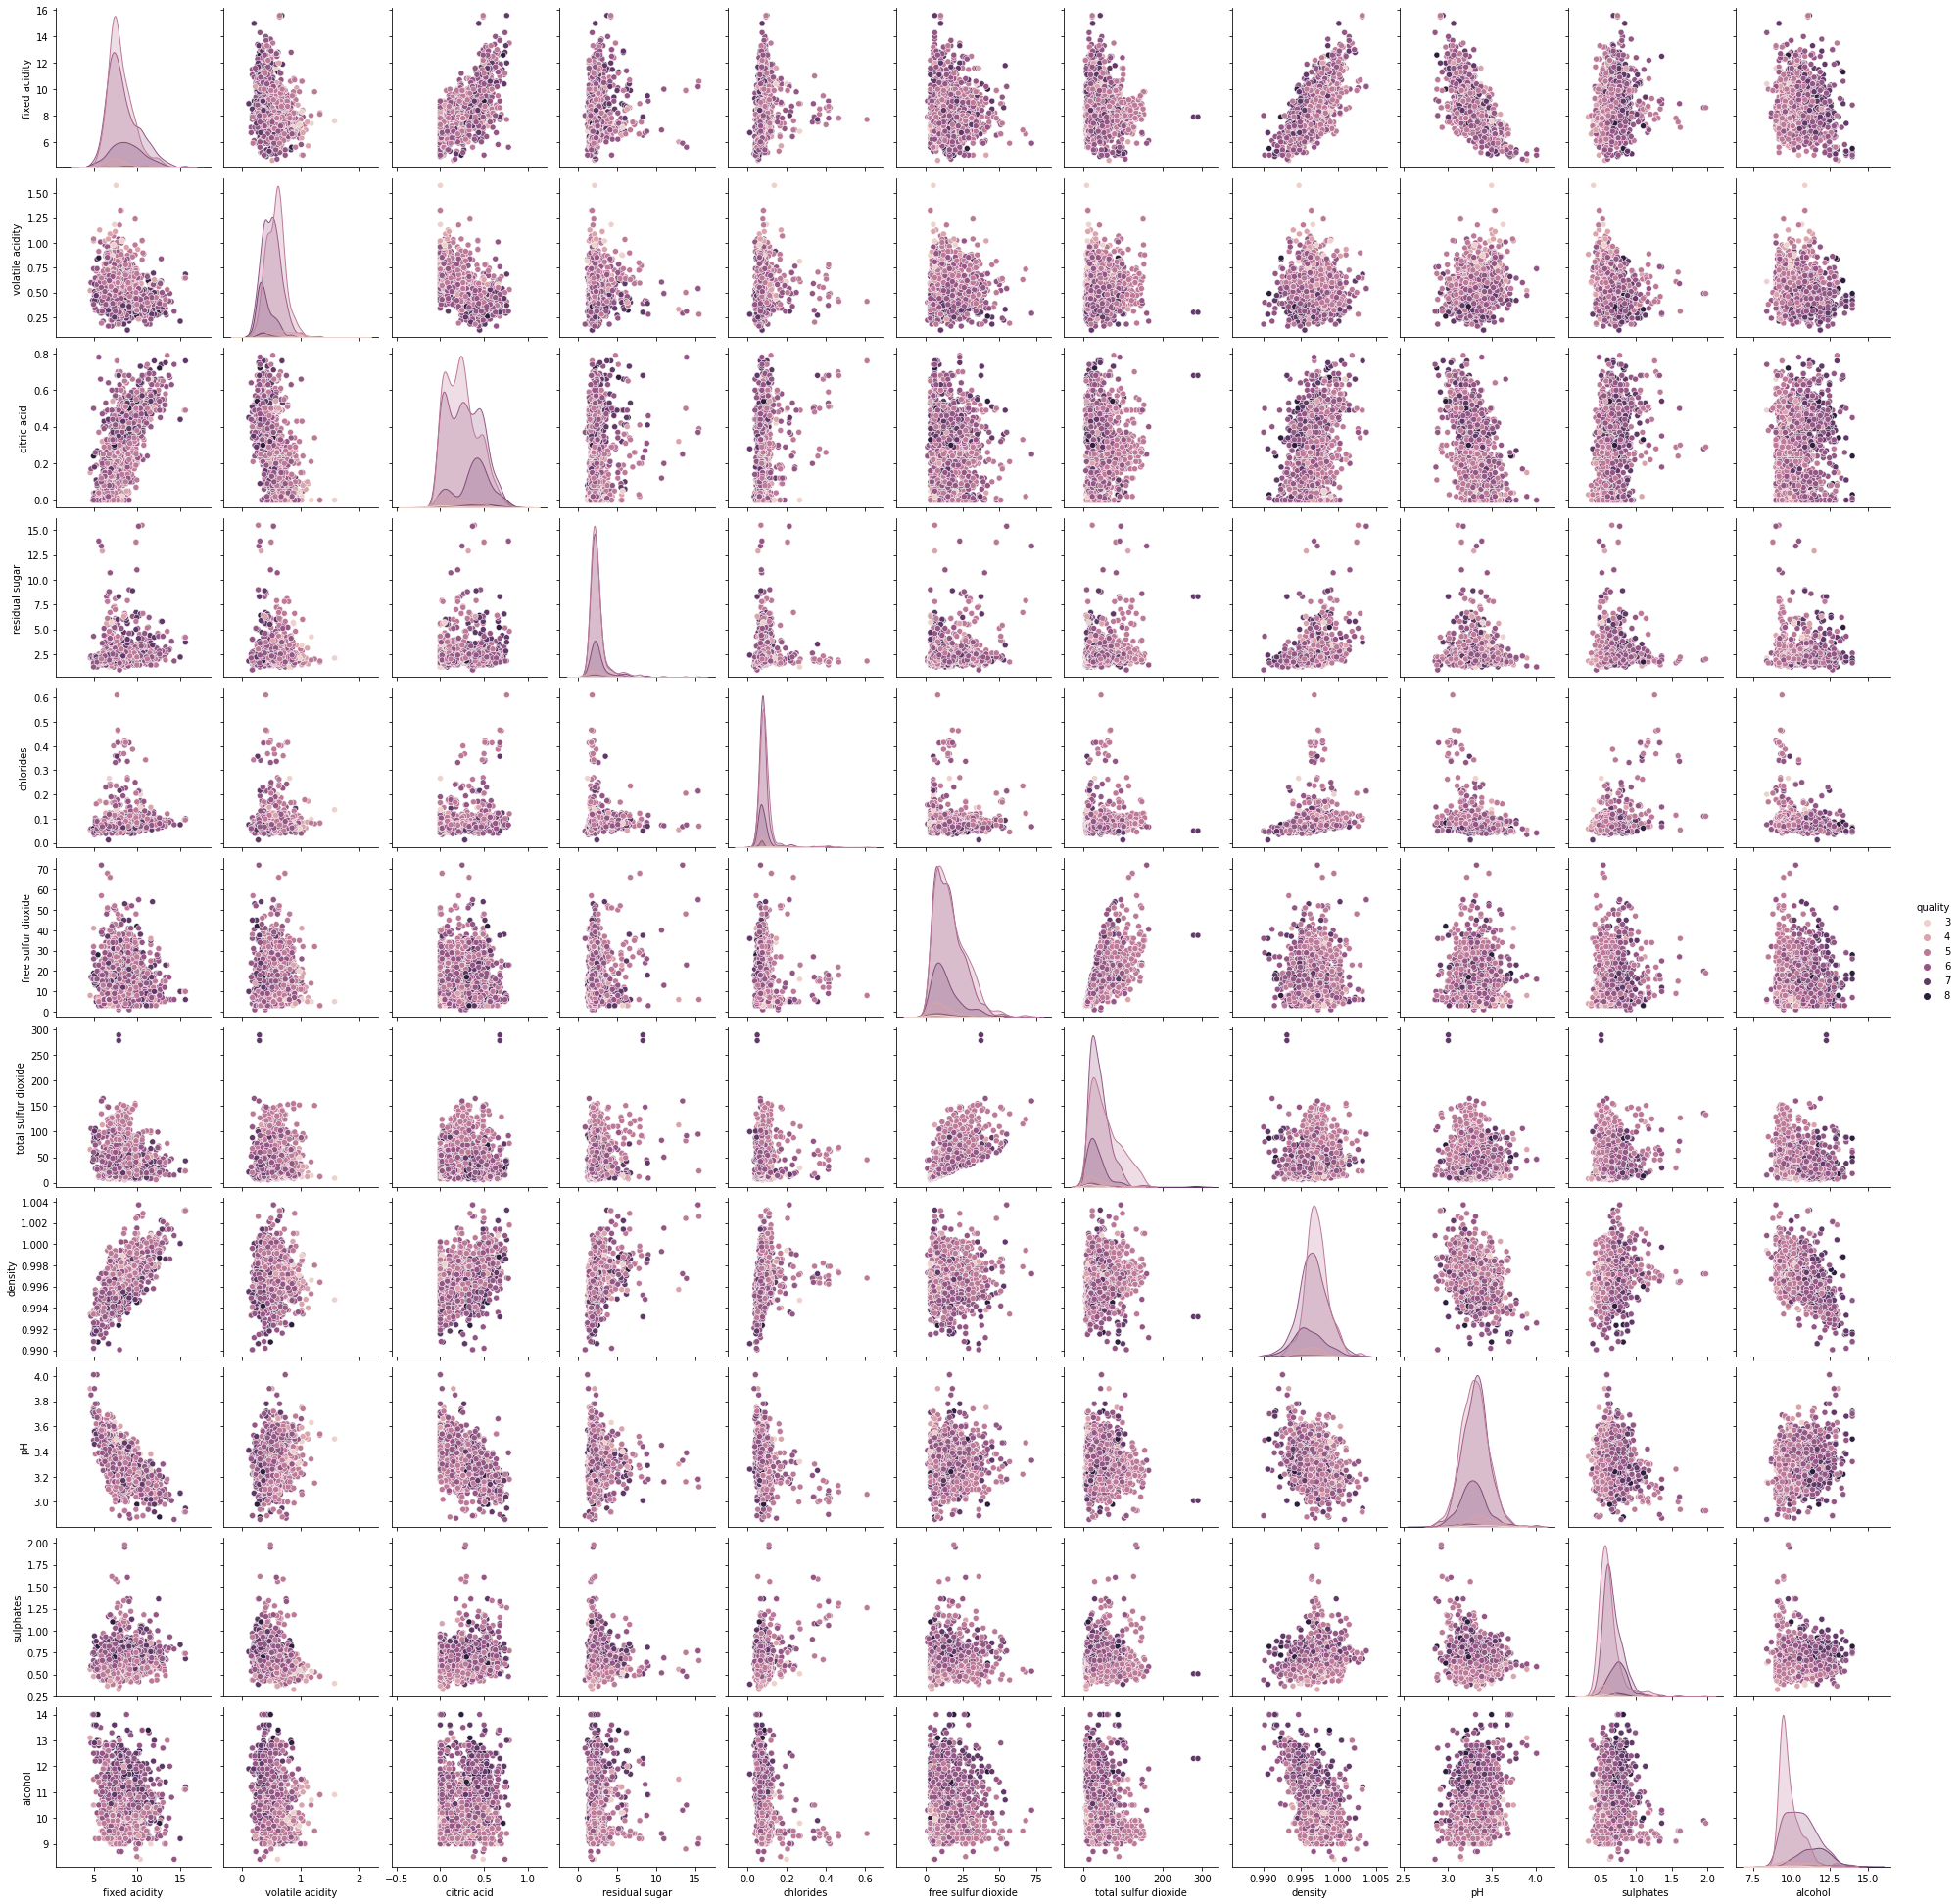

In [12]:
# quality를 hue로 지정해서 나타낸 컬럼별 산점도
sns.pairplot(wine,hue='quality')
plt.show()

#### Quality 점수별 파이그래프

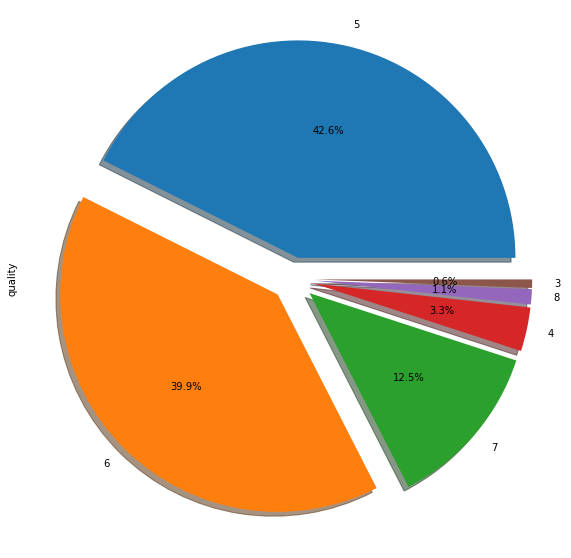

In [13]:
# 여백, 그림자, 크기 설정 후 퀄리티 점수별 파이그래프 나타내기
wine.quality.value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,10))
plt.show()

#### 상관도 분석

In [14]:
# correlation_상관계수 구하기
# 황산염(sulphates), 알코올(alcohol)이 높을수록, 휘발성 산도(volatile acidity)가 낮을수록 와인 품질에 긍정적인 영향을 미침
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255155,0.673008,0.106105,0.093876,-0.157011,-0.116725,0.670895,-0.685062,0.185061,-0.073644,0.127766
volatile acidity,-0.255155,1.000000,-0.554503,0.003957,0.064332,-0.010077,0.077515,0.022390,0.235119,-0.269707,-0.201160,-0.391735
citric acid,0.673008,-0.554503,1.000000,0.139208,0.185893,-0.065745,0.033206,0.363162,-0.537645,0.306241,0.108285,0.233733
residual sugar,0.106105,0.003957,0.139208,1.000000,0.053401,0.186203,0.203252,0.355503,-0.081154,0.002378,0.033380,0.016464
chlorides,0.093876,0.064332,0.185893,0.053401,1.000000,-0.005569,0.043551,0.197957,-0.250010,0.339910,-0.224965,-0.119770
free sulfur dioxide,-0.157011,-0.010077,-0.065745,0.186203,-0.005569,1.000000,0.668426,-0.023672,0.076000,0.043461,-0.070382,-0.048641
total sulfur dioxide,-0.116725,0.077515,0.033206,0.203252,0.043551,0.668426,1.000000,0.070240,-0.060311,0.027173,-0.208148,-0.185404
density,0.670895,0.022390,0.363162,0.355503,0.197957,-0.023672,0.070240,1.000000,-0.340093,0.145326,-0.499736,-0.173251
pH,-0.685062,0.235119,-0.537645,-0.081154,-0.250010,0.076000,-0.060311,-0.340093,1.000000,-0.173073,0.211157,-0.063373
sulphates,0.185061,-0.269707,0.306241,0.002378,0.339910,0.043461,0.027173,0.145326,-0.173073,1.000000,0.102423,0.270777


In [15]:
# 정밀도를 컬러맵으로 나타내기(warm에 가까울 수록 1에 가깝고 cool에 가까울 수록 0에 가까움)
wine.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.26,0.67,0.11,0.09,-0.16,-0.12,0.67,-0.69,0.19,-0.07,0.13
volatile acidity,-0.26,1.00,-0.55,0.00,0.06,-0.01,0.08,0.02,0.24,-0.27,-0.20,-0.39
citric acid,0.67,-0.55,1.00,0.14,0.19,-0.07,0.03,0.36,-0.54,0.31,0.11,0.23
residual sugar,0.11,0.00,0.14,1.00,0.05,0.19,0.20,0.36,-0.08,0.00,0.03,0.02
chlorides,0.09,0.06,0.19,0.05,1.00,-0.01,0.04,0.20,-0.25,0.34,-0.22,-0.12
free sulfur dioxide,-0.16,-0.01,-0.07,0.19,-0.01,1.00,0.67,-0.02,0.08,0.04,-0.07,-0.05
total sulfur dioxide,-0.12,0.08,0.03,0.20,0.04,0.67,1.00,0.07,-0.06,0.03,-0.21,-0.19
density,0.67,0.02,0.36,0.36,0.20,-0.02,0.07,1.00,-0.34,0.15,-0.50,-0.17
pH,-0.69,0.24,-0.54,-0.08,-0.25,0.08,-0.06,-0.34,1.00,-0.17,0.21,-0.06
sulphates,0.19,-0.27,0.31,0.00,0.34,0.04,0.03,0.15,-0.17,1.00,0.10,0.27


In [22]:
# corr에서 절대값 0.1 미만 컬럼 3개 삭제 
wine = wine.drop('residual sugar',axis=1)
wine = wine.drop('free sulfur dioxide',axis=1)
wine = wine.drop('pH',axis=1)
wine

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,0.090,44.0,0.99490,0.58,10.5,5
1592,5.9,0.550,0.10,0.062,51.0,0.99512,0.76,11.2,6
1593,6.3,0.510,0.13,0.076,40.0,0.99574,0.75,11.0,6
1594,5.9,0.645,0.12,0.075,44.0,0.99547,0.71,10.2,5


### **5. 모델링**

#### 1) 학습데이터 / 시험데이터 분리 <br>
quality를 타겟 데이터로 분리하고 나머지를 x에 저장

In [23]:
# 필요 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [24]:
# x에서 wine의 quality 컬럼을 drop
# y에 drop한 quality 컬럼 지정
x = wine.drop('quality',axis=1)
y = wine.quality

In [25]:
# x 행렬 크기
x.shape

(1596, 8)

In [26]:
# y 행렬 크기
y.shape

(1596,)

In [28]:
# test size 0.20으로 타겟 데이터 분리(train_test)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

#### 2) 모델 구축

##### logistic regression

In [29]:
# 필요 라이브러리 불러오기
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
#Fit the model
model.fit(x_train, y_train)
# 모델 사용하기
y_pred = model.predict(x_test)
#Score/Accuracy
print("Accuracy --> ", model.score(x_test, y_test)*100)


Accuracy -->  58.12500000000001


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


로지스틱 회귀로는 Accuracy -->  56.875 로 결과값이 낮아 실효성이 낮음


##### knn

In [31]:
# 필요 라이브러리 불러오기
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV

In [32]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)
# x,y train 데이터 학습시키기
knn.fit(x_train,y_train)
# x,y train/test 데이터 score 출력
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.6724137931034483
0.54375


In [34]:
# 이웃수를 5로, 맨해트 거리, 가중치를 거리로 적용한 버전
knn=KNeighborsClassifier(n_neighbors=47,p=1,weights='distance')

# x, y train 데이터 학습시키기
knn.fit(x_train,y_train)
# x,y train/test 데이터 score 출력
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

1.0
0.653125


튜닝

In [35]:
params = {'n_neighbors':range(23, 55), 'p':[1, 2], 'weights':['distance', 'uniform']}
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, params, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'n_neighbors': 24, 'p': 1, 'weights': 'distance'}


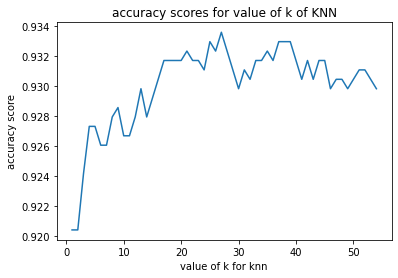

In [36]:
k_range = list(range(1,55))
scores=[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, p=1,weights='distance')
    knn.fit(x_train,y_train)
    y_pred = knn.predict(x)
    scores.append(metrics.accuracy_score(y,y_pred))

plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('accuracy score')
plt.title('accuracy scores for value of k of KNN')
plt.show()

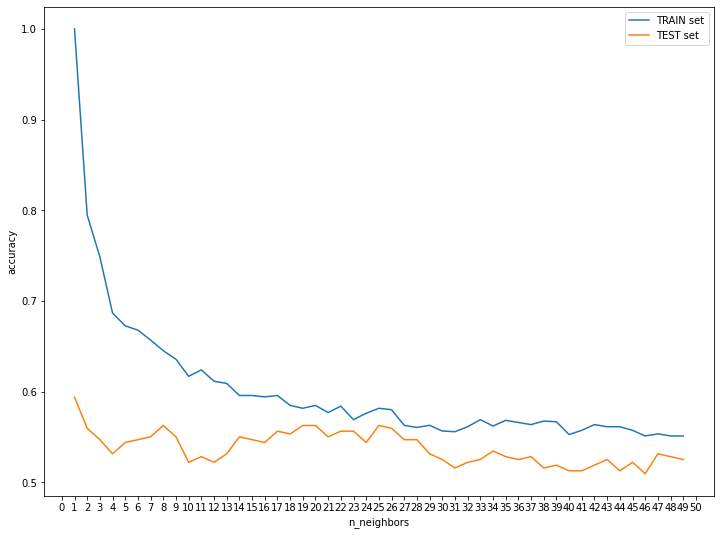

In [37]:
train_acc = []
test_acc = []

for n in range(1,50):
    clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=n)
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append((prediction==y_test).mean())

plt.figure(figsize=(12, 9))
plt.plot(range(1, 50), train_acc, label='TRAIN set')
plt.plot(range(1, 50), test_acc, label='TEST set')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.xticks(np.arange(0, 51, step=1))
plt.legend()

##### XGBOOST

In [38]:
import xgboost as xgb

In [39]:
xgb_clf = xgb.XGBRFClassifier()
xgb_clf = xgb_clf.fit(x_train,y_train)

print(xgb_clf.score(x_train,y_train))
print(xgb_clf.score(x_test,y_test))

0.6261755485893417
0.603125


튜닝

In [40]:
params = {'max_depth':range(9, 20, 2), 'learning_rate':[0.1], 'n_estimators':range(290, 310, 5)}
xgb_clf = xgb.XGBRFClassifier()
grid = GridSearchCV(xgb_clf, params, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)

{'learning_rate': 0.1, 'max_depth': 17, 'n_estimators': 305}


In [41]:
print(grid.score(x_train,y_train))
print(grid.score(x_test,y_test))

0.8769592476489029
0.678125


##### decision tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(x_train, y_train)

accuracy5=model1.score(x_test,y_test)
print(accuracy5*100,'%')
model1

60.0 %


DecisionTreeClassifier(random_state=1)

In [44]:
# feature_names, class_names 리스트 작성
names = """1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol"""
names = names.split('\n')
names

fnames = list(map(lambda x: x.split('-')[-1].strip(), names))
tnames = ['Qt'+str(i) for i in range(3, 9)]

In [45]:
np.unique(y_train, return_counts=True)

(array([3, 4, 5, 6, 7, 8]), array([  8,  40, 533, 521, 158,  16]))

In [46]:
np.unique(y_test, return_counts=True)

(array([3, 4, 5, 6, 7, 8]), array([  2,  12, 147, 116,  41,   2]))

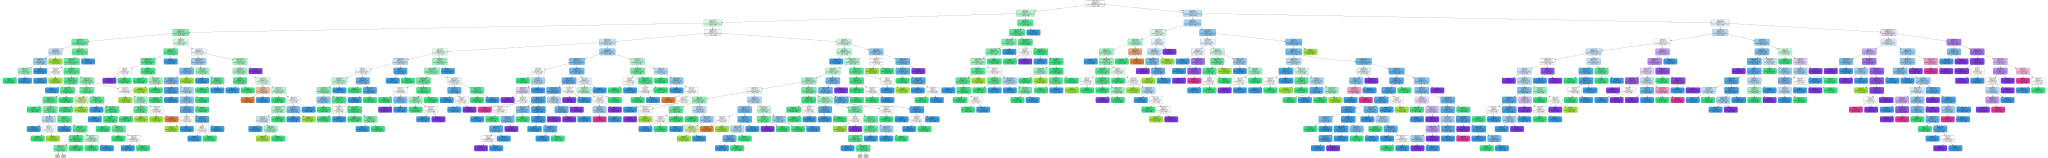

In [52]:
# 트리모델
tree = model1.tree_
import graphviz
from sklearn.tree import export_graphviz, plot_tree

dot_data = export_graphviz(model1, out_file=None,   
                     filled=True, rounded=True,
                     feature_names = None,
                     max_depth=15, 
                     class_names= tnames,  
                     special_characters=True)
graph = graphviz.Source(dot_data)  
graph

In [53]:
model1.get_depth()

19

튜닝

In [54]:
params = {'criterion':["gini"] , 'max_depth' : [15], 'min_samples_leaf':range(6, 15), 'min_samples_split':[3]}
model1 = DecisionTreeClassifier()
grid = GridSearchCV(model1, params, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 9, 'min_samples_split': 3}
0.559375


##### Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB, ComplementNB, MultinomialNB

In [56]:
"""BernoulliNB : Naive Bayes classifier for multivariate Bernoulli models.
CategoricalNB : Naive Bayes classifier for categorical features.
ComplementNB : Complement Naive Bayes classifier.
MultinomialNB : Naive Bayes classifier for multinomial models."""

'BernoulliNB : Naive Bayes classifier for multivariate Bernoulli models.\nCategoricalNB : Naive Bayes classifier for categorical features.\nComplementNB : Complement Naive Bayes classifier.\nMultinomialNB : Naive Bayes classifier for multinomial models.'

In [57]:
nvclass = GaussianNB()
nvclass.fit(x_train,y_train)
y_pr=nvclass.predict(x_test)

accuracy4=nvclass.score(x_test,y_test)
print(accuracy4*100,'%')

58.4375 %


##### SVM

In [58]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel
#Train the model using the training sets
clf.fit(x_train, y_train)
#Predict the response for test dataset
y_pred = clf.predict(x_test)
#Score/Accuracy
print("Accuracy --> ", clf.score(x_test, y_test)*100)


Accuracy -->  58.4375


튜닝

In [59]:
clf.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [62]:
# params = {'gamma': [0.01, 0.1],
#           'C': [0.1, 1]}
# {'C': 1, 'gamma': 0.01} accuracy = 0.621875
params = {'gamma': [0.001, 0.01],
          'C': [1, 10, 100]}

clf = svm.SVC(kernel='linear')
grid = GridSearchCV(clf, params, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.score(x_test,y_test))

KeyboardInterrupt: ignored

##### Random Forest Classifier



In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
ran_class=RandomForestClassifier(random_state = 2)
ran_class.fit(x_train,y_train)

accuracy3=ran_class.score(x_test,y_test)
print(accuracy3*100,'%')

71.875 %


튜닝했을때, 개선되지 않았음. 이유를 도통 모르겠음.

In [65]:
# params = {'criterion':["gini", "entropy"] , 'max_depth' : range(2,15), 'min_samples_leaf':range(2,6), 'min_samples_split':range(2,6)}
params = {'criterion':["entropy"] , 'min_samples_leaf':[2], 'min_samples_split':[6]}
ran_class=RandomForestClassifier(random_state = 2)
grid = GridSearchCV(ran_class, params, n_jobs=-1)
grid.fit(x_train, y_train)
print(grid.best_params_)
print(grid.score(x_test,y_test))

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 6}
0.703125


#### 3) Pipeline 최적화 모델 탐색, (스케일러 사용시 결과가 좋을지 시도)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

params = [{'scaler':[MinMaxScaler(), StandardScaler(), RobustScaler()],
           'clf':[KNeighborsClassifier()],
           'clf__n_neighbors': range(23, 55, 2), 
           'clf__p':[1, 2], 
           'clf__weights':['distance', 'uniform']},
          {'scaler':[MinMaxScaler(), StandardScaler(), RobustScaler()],
           'clf':[LogisticRegression()]},
          {'scaler':[MinMaxScaler(), StandardScaler(), RobustScaler()],
           'clf':[xgb.XGBRFClassifier()], 
           'clf__max_depth':range(6, 15), 
           'clf__learning_rate':[0.1], 
           'clf__n_estimators':range(290, 310, 5)},
          {'scaler':[MinMaxScaler(), StandardScaler(), RobustScaler()],
           'clf' : [DecisionTreeClassifier()],
           'clf__criterion':["gini", "entropy"] , 
           'clf__max_depth' : range(3,6), 
           'clf__min_samples_split':range(2, 5), 
           'clf__min_samples_leaf':range(6, 15) },
          {'scaler':[MinMaxScaler(), StandardScaler(), RobustScaler()],
           'clf' : [GaussianNB()]},
          {'scaler':[MinMaxScaler(), StandardScaler(), RobustScaler()],
           'clf' : [svm.SVC()], 
           'clf__gamma': [0.01],
          'clf__C': [1] },
          {'scaler':[MinMaxScaler(), StandardScaler(), RobustScaler()],
           'clf': [RandomForestClassifier(random_state=2)]}]

pipe = Pipeline([('scaler', MinMaxScaler()), ('clf',KNeighborsClassifier())])

grid = GridSearchCV(pipe, params, n_jobs= -1)
grid.fit(x_train, y_train)

print(f"best model is {grid.best_estimator_}")
print(f"best score is {grid.score(x_test, y_test)}")

### 6. 결론
스케일러 사용시 결과가 더 좋지 않았다.
스케일러를 쓰지 않고, 튜닝을 하지않은 randomforest모델만 70% 이상의 정확도를 보였고, 다른 모델들은 낮은 수치를 보였다.